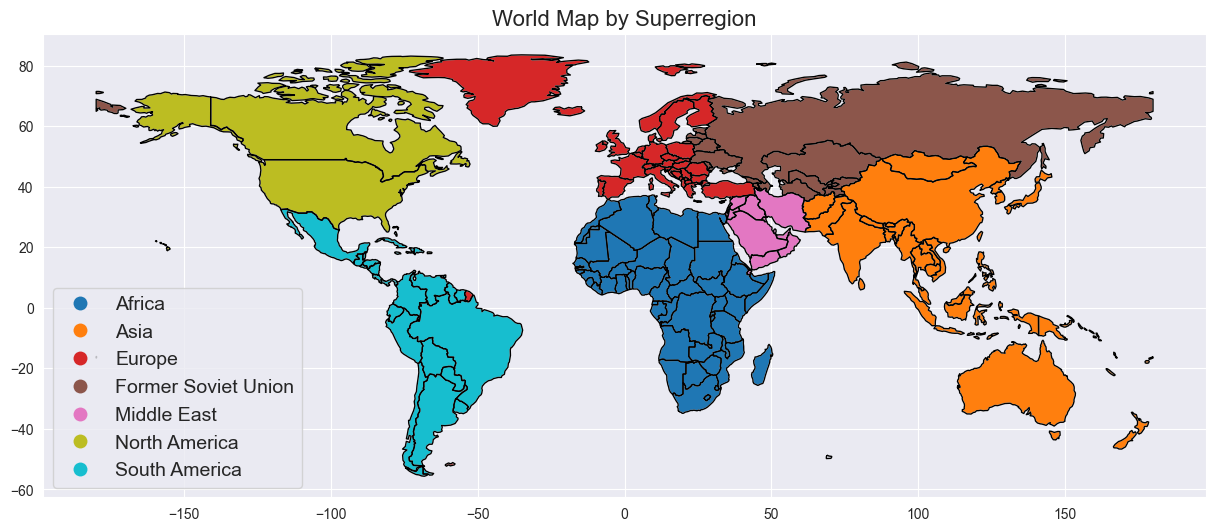

In [23]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Importing
shapefile_path = "Datasets/World Map/ne_110m_admin_0_countries.shp"
csv_path = "Datasets/Country_to_Superregion.csv"
shapefile = gpd.read_file(shapefile_path)
country_to_superregion = pd.read_csv(csv_path)

# Creating World
shapefile = shapefile[shapefile["NAME"] != "Antarctica"]
world = shapefile.merge(country_to_superregion, how='left', left_on='NAME', right_on='Country name')

# Creating Plot
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
shapefile.boundary.plot(ax=ax, linewidth=1, color="black")  # Plot boundaries for context
world.plot(column='Continent', ax=ax, legend=True, legend_kwds={'loc': 'lower left', "fontsize":14, "title_fontsize":14})
plt.title("World Map by Superregion", fontsize=16)
plt.savefig('Outputs/WorldMapSuperregion.png')
plt.show()

### Missing Country Calculations
The following code was used to manually find and fix countries missing from their assigned superregions. This was because the shape file had different names (i.e. DRC as Dem. Rep. Congo instead of Democratic Republic of the Congo) then the list of countries I had matched the superregions too.

In [22]:
# Find missing regions
missing_regions = world[world['Continent'].isna()]

# Display missing regions
print("Missing Regions:")
print(missing_regions["NAME"].tolist())

Missing Regions:
['W. Sahara', 'Dem. Rep. Congo', 'Dominican Rep.', 'Bahamas', 'Falkland Is.', 'Fr. S. Antarctic Lands', 'Timor-Leste', "Côte d'Ivoire", 'Central African Rep.', 'Congo', 'Eq. Guinea', 'eSwatini', 'Gambia', 'Solomon Is.', 'Taiwan', 'N. Cyprus', 'Somaliland', 'Bosnia and Herz.', 'North Macedonia', 'S. Sudan']
